In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Loading the DataFrame
df = pd.read_csv("datasetSpaceX.csv")

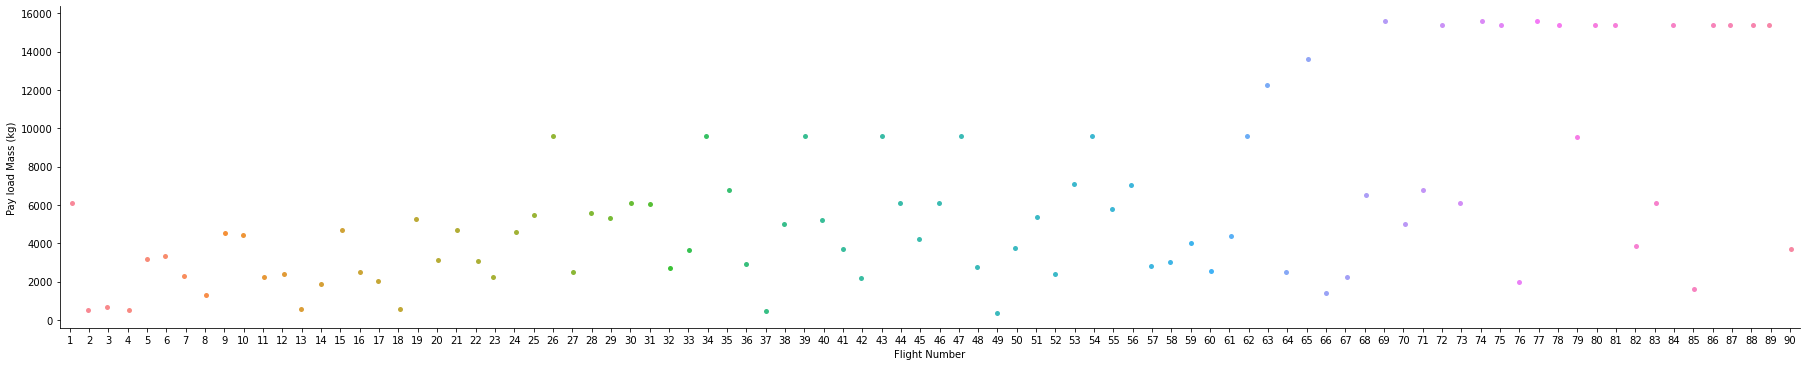

In [3]:
# Correlation between FlighNumber vs PayloadMass

sns.catplot(y="PayloadMass", x="FlightNumber", data=df, aspect=5)
plt.xlabel("Flight Number")
plt.ylabel("Pay load Mass (kg)")
plt.show()


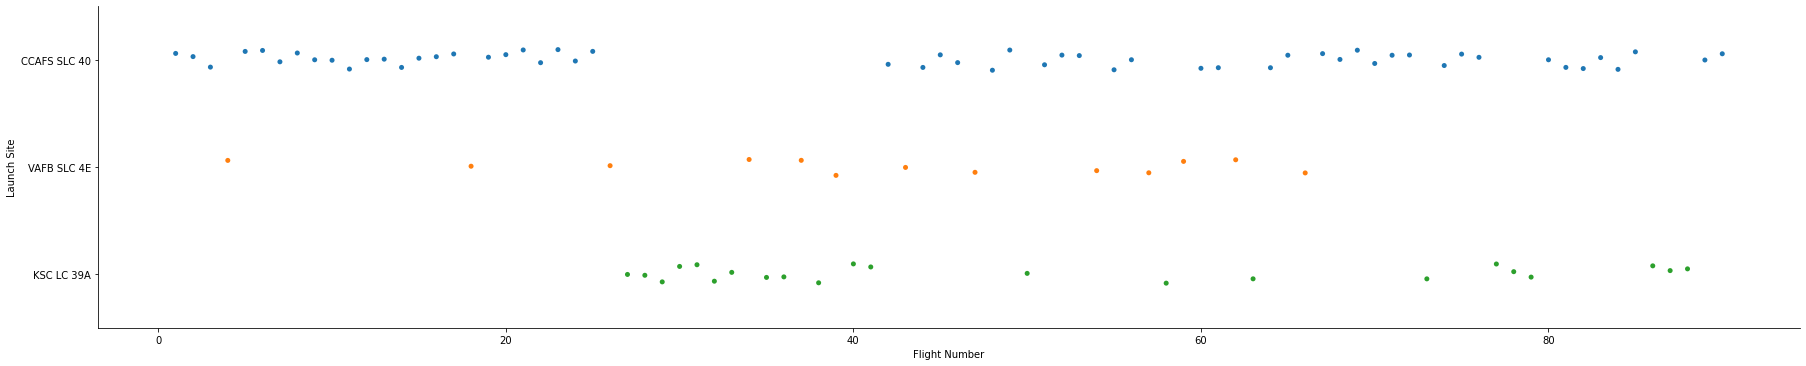

In [4]:
# Correlation between FlightNumber vs LaunchSite

sns.catplot(y="LaunchSite", x="FlightNumber", data=df, aspect=5)
plt.xlabel("Flight Number")
plt.ylabel("Launch Site")
plt.show()

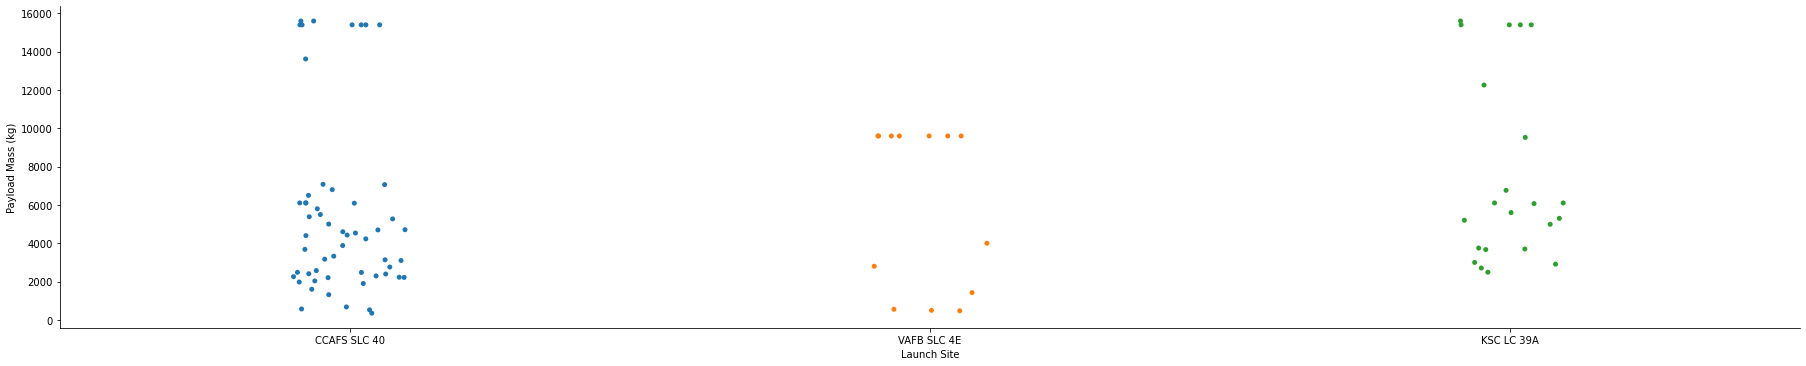

In [5]:
# Correlation between Payload vs Launch Site

sns.catplot(y="PayloadMass", x="LaunchSite", data=df, aspect=5)
plt.xlabel("Launch Site")
plt.ylabel("Payload Mass (kg)")
plt.show()

In [6]:
# Correlation between success rate of each orbit type

orbit_group = df[["Orbit", "Class"]]
orbit_group1 = orbit_group.groupby(["Orbit"]).mean()

In [7]:
orbit_group.groupby(["Class"]).count()

,Orbit
Class,
0,30
1,60


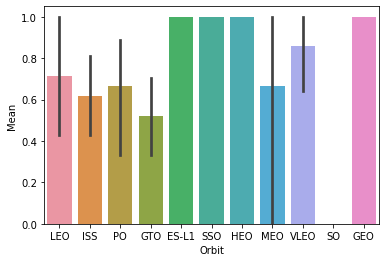

In [8]:
sns.barplot(y="Class", x="Orbit", data=df)
plt.xlabel("Orbit")
plt.ylabel("Mean")
plt.show()

In [9]:
df.columns

Index(['Unnamed: 0', 'FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass',
       'Orbit', 'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused',
       'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude',
       'Latitude', 'Class'],
      dtype='object')

In [ ]:
# Relationship Payload and Orbit

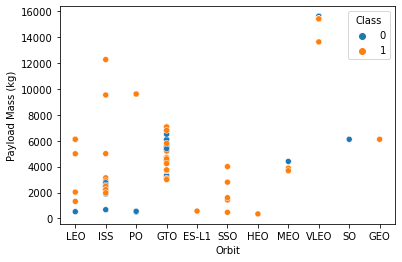

In [10]:
sns.scatterplot(x="Orbit", y="PayloadMass", hue="Class", data=df)
plt.xlabel("Orbit")
plt.ylabel("Payload Mass (kg)")
plt.show()

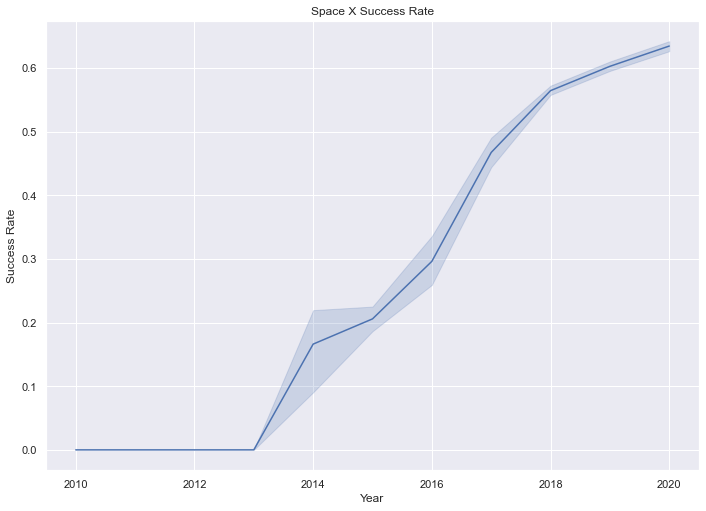

In [12]:
# Launch Success yearly trend

year = pd.DatetimeIndex(df["Date"]).year
year = np.array(list(year))
successratelist = []
successrate = 0.00
records = 1
data = 0

for x in df["Class"]:
    data = x + data
    successrate = data/records
    successratelist.append(successrate)
    records += 1
    
successratelist = np.array(successratelist)
d = {"successrate" : successratelist, "year" : year}
sns.set(rc={"figure.figsize":(11.7,8.27)})
sns.lineplot(data=d, x="year", y="successrate")

plt.xlabel("Year")
plt.ylabel("Success Rate")
plt.title("Space X Success Rate")
plt.show()